<a href="https://colab.research.google.com/github/sutharimanikanta/Golab/blob/main/Using_different_model_for_NLP_Task(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-18384b57-7215-3e8a-fd30-2f4277e3f0d6)


In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-11 03:57:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-11 03:57:37 (79.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

Download a text dataset


In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-02-11 03:57:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 142.250.1.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-02-11 03:57:41 (141 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


the training data we downloaded is probably shuffled but its better to shuffled

In [ ]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


Inputs (text column) -> Machine Learning Algorithm -> Outputs (target column)

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
import numpy as np

dict = train_df.target.value_counts()

# Remove None values
dict_filtered = {k: v for k, v in dict.items() }
print(dict_filtered)

max_freq_key = max(dict_filtered, key=dict_filtered.get)
print(max_freq_key)


{0: 4342, 1: 3271}
0


In [ ]:
print(f"Total training samples:{len(train_df)}")
print(f"Total training samples:{len(test_df)}")
print(f"Total training samples:{len(train_df)+len(test_df)}")

Total training samples:7613
Total training samples:3263
Total training samples:10876


* 🤔 Question: Why visualize random samples? You could visualize samples in order but this could lead to only seeing a certain subset of data. Better to visualize a substantial quantity (100+) of random samples to get an idea of the different kinds of data you're working with. In machine learning, never underestimate the power of randomness.



In [ ]:
import random
random_index=random.randint(0,len(train_df)-5)
# selecting text an dtarget of 5 pairs which are taken as a tuple of target and text
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():

  _, text, target = row
  print(_)
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")


3796
Target: 1 (real disaster)
Text:
Found this cool photo not mine 1952 Dodge Wayne bodied 4 window bus.  Ex Libby MT Fire Department truck. All oriÛ_ http://t.co/mcEjZzxgh8

---

4791
Target: 0 (not real disaster)
Text:
#auspol Can you see the resemblance between ABBOTT &amp; Campbell both are loud and came in with a big BANG!! Out the same way;  Lets see !

---

2222
Target: 1 (real disaster)
Text:
Perhaps 'historic' should be applied not to the deluge of recently exposed #ChildSexAbuse but the truly 'historic' scale of the cover-up

---

4653
Target: 0 (not real disaster)
Text:
@tonymcguinness probably being inundated with this question now but who's coming to creamfields??? (please say all 3) #Mainstage

---

4373
Target: 1 (real disaster)
Text:
California School Bus Hijacker Parole Stands http://t.co/kPIVXGjNqt #sacramento

---



Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [ ]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels),

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

Wonderful! We've got a training set and a validation set containing Tweets and labels.

Our labels are in numerical form (`0` and `1`) but our Tweets are in string form.

> 🤔 **Question:** What do you think we have to do before we can use a machine learning algorithm with our text data?

If you answered something along the lines of "turn it into numbers", you're correct. A machine learning algorithm requires its inputs to be in numerical form.

In NLP, there are two main concepts for turning text into numbers:
* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being `0`, "love" being `1` and "TensorFlow" being `2`. In this case, every word in a sequence considered a single **token**.
  2. **Character-level tokenization**, such as converting the letters A-Z to values `1-26`. In this case, every character in a sequence considered a single **token**.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.
* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
  1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Example of **tokenization** (straight mapping from word to number) and **embedding** (richer representation of relationships between tokens).*

> 🤔 **Question:** What level of tokenzation should I use? What embedding should should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)).

If you're looking for pre-trained word embeddings, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding) are great places to start.

> 🔑 **Note:** Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

* text vectorization(tokenization)
max-tokens- the max no of words in your vocabulary include a value for oov(Out of Vocabulary)
* standardize- method for standardizing text
"lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* split-how to split text
default is "whitespace" which splits on spaces.
* ngrams - How many words to contain per token split,
- for example, ngrams=2 splits tokens into continuous sequences of 2.
* output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes,

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


In [ ]:
text_vectorization=TextVectorization(max_tokens=None,
                                     standardize="lower_and_strip_punctuation",
                                     split="whitespace",
                                     ngrams=None,#no of groups
                                     output_mode="int",
                                     output_sequence_length=None)
#pad_to_max_token realted to max_tokens

In [ ]:
# Find average number of tokens (words) in training Tweets
# split for converting sentance into words
for i in train_sentences[:2]:
  print(i)
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

@mogacola @zamtriossu i screamed after hitting tweet
Imagine getting flattened by Kurt Zouma


15

In [ ]:
max_vocab_length=10000
max_length=15
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,# to consider in  vocabulary
                                  output_mode="int",
                                  output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence="manikanta"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [ ]:
sample_sentence="There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
How is it one careless match can start a forest fire but it takes a whole box to start a campfire      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  62,    9,   15,   61,    1, 1502,   71,  667,    3,  188,   42,
          30,   15,  872,    3]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# forimg embedding useing embedding layers

* We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

* The main parameters we're concerned about here are:

* input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* input_length - Length of sequences being passed to embedding layer.*

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

In [ ]:
embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

we can use  embedding layer as they are trainable

In [ ]:
random_sentence=random.choice(train_sentences)
print(f"Original text{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original textSinjar Massacre Yazidis Blast Lack of Action OveråÊHostages http://t.co/Carvv6gsRb http://t.co/lAn76ZqKxG      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01969159,  0.01224019,  0.04131074, ...,  0.04470358,
          0.02694125,  0.02493662],
        [ 0.01416771,  0.0155247 ,  0.03568367, ..., -0.00071381,
         -0.04327363, -0.00901379],
        [ 0.02410919, -0.02867935,  0.00526671, ..., -0.01496451,
         -0.00881907,  0.00602601],
        ...,
        [ 0.01797782,  0.03640301, -0.03479081, ...,  0.04771434,
          0.03462258, -0.03749611],
        [ 0.01797782,  0.03640301, -0.03479081, ...,  0.04771434,
          0.03462258, -0.03749611],
        [ 0.01797782,  0.03640301, -0.03479081, ...,  0.04771434,
          0.03462258, -0.03749611]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 1.9691590e-02,  1.2240194e-02,  4.1310739e-02, -2.6431179e-02,
       -8.6726658e-03,  3.7176538e-02,  3.7958156e-02,  7.2672851e-03,
        3.9087724e-02, -4.4166412e-02,  3.1371284e-02,  3.0835737e-02,
       -1.3525020e-02,  4.3205176e-02,  2.4594855e-02, -1.2072753e-02,
        1.2232482e-02,  2.9049102e-02, -1.1961557e-02, -4.2452525e-02,
        4.3592978e-02, -7.4105337e-04, -5.6664236e-03, -4.9136735e-02,
       -2.4495317e-02,  2.0246748e-02, -3.9308965e-02, -6.0273409e-03,
        1.0619618e-02,  2.8613321e-03,  4.0330179e-03,  3.2119405e-02,
        4.5864973e-02, -2.9378906e-03, -1.6651295e-02,  1.6319286e-02,
        4.4364665e-02, -3.0436516e-02,  3.7858251e-02,  4.8655976e-02,
       -3.0071056e-02, -4.2905435e-03,  2.4988178e-02,  4.3556955e-02,
        2.3304727e-02,  4.8184659e-02, -4.3405320e-02, -3.9783489e-02,
       -2.6364673e-02,  4.7434304e-02,  1.7674234e-02, -1.5991606e-02,
        2.5210354e-02,  2.860

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data
* Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:

* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison

Model 0: Getting a baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm. This was chosen via referring to the Scikit-Learn machine learning map.

**which allows you to chain together multiple transformers and an estimator into a single object.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer# feature extraction method
from sklearn.naive_bayes import MultinomialNB# Naive Bayes classifier suitable for classification with discrete features (such as word counts for text classification).
from sklearn.pipeline import Pipeline#This is a way to streamline a lot of the routine processes
# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

* The benefit of using a shallow model like Multinomial Naive Bayes is that training is very fast.

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

**Creating an evaluation function for our model experiments**

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
#val_labels

In [ ]:
#baseline_preds

In [ ]:
baseline_results=calculate_results(y_true=val_labels,
                                   y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1:A simple dense model

* create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
model_1_history=model_1.fit(train_sentences,
                            train_labels,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1")])

Saving TensorBoard log files to: model_logs/model_1/20240211-035745
215/215 [==============================] - 18s 65ms/step - loss: 0.6101 - accuracy: 0.6919 - val_loss: 0.5362 - val_accuracy: 0.7546


In [ ]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.7546


[0.5361607074737549, 0.7545931935310364]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 4.9153708e-02,  3.5243242e-03, -6.9839321e-02, ...,
          1.6208755e-02,  2.3006549e-05, -3.7407759e-03],
        [ 2.3585256e-02,  3.7990853e-02, -2.3172848e-02, ...,
          8.9854542e-03, -8.5928319e-03,  1.1391951e-02],
        [ 1.9070260e-02, -3.4348856e-04, -4.2145015e-03, ...,
         -5.5147015e-02,  5.7183340e-04,  7.3189028e-02],
        ...,
        [ 4.0833626e-02, -2.2963965e-02,  3.2275129e-02, ...,
          2.8251614e-02, -3.2097436e-02,  9.7932331e-03],
        [-8.5347313e-03, -2.6041325e-02, -9.9683367e-03, ...,
         -4.9875524e-02,  1.3661028e-02,  2.8167900e-02],
        [-2.1638146e-02, -4.4154994e-02,  2.0816760e-02, ...,
          2.6073929e-02, -1.8079570e-02,  9.6424774e-04]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
pred=model_1.predict(val_sentences)
print(pred[:10])

24/24 [==============================] - 0s 3ms/step
[[0.40171194]
 [0.66464907]
 [0.78546286]
 [0.26142457]
 [0.34100264]
 [0.6400972 ]
 [0.66431   ]
 [0.6484085 ]
 [0.6490963 ]
 [0.23505561]]


**Since our final layers uses a sigmoid activation function**

In [ ]:
# turn prediction probabiites
model_1_preds=tf.squeeze(tf.round(pred))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 75.45931758530183,
 'precision': 0.7803359626591955,
 'recall': 0.7545931758530183,
 'f1': 0.743523573323244}

In [ ]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

comparison_result = np.all(np.array(list(model_1_results.values())) > np.array(list(baseline_results.values())))
print("Is our simple Keras model better than our baseline model?", comparison_result)


Is our simple Keras model better than our baseline model? False


In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 75.46, Difference: -3.81
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.74, Difference: -0.04


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

# visualizing learned embeddings

In [ ]:
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
embed_weights=model_1.get_layer("embedding_1").get_weights()[0]# first element
print(embed_weights)
print(embed_weights.shape)

[[ 4.9153708e-02  3.5243242e-03 -6.9839321e-02 ...  1.6208755e-02
   2.3006549e-05 -3.7407759e-03]
 [ 2.3585256e-02  3.7990853e-02 -2.3172848e-02 ...  8.9854542e-03
  -8.5928319e-03  1.1391951e-02]
 [ 1.9070260e-02 -3.4348856e-04 -4.2145015e-03 ... -5.5147015e-02
   5.7183340e-04  7.3189028e-02]
 ...
 [ 4.0833626e-02 -2.2963965e-02  3.2275129e-02 ...  2.8251614e-02
  -3.2097436e-02  9.7932331e-03]
 [-8.5347313e-03 -2.6041325e-02 -9.9683367e-03 ... -4.9875524e-02
   1.3661028e-02  2.8167900e-02]
 [-2.1638146e-02 -4.4154994e-02  2.0816760e-02 ...  2.6073929e-02
  -1.8079570e-02  9.6424774e-04]]
(10000, 128)


# using embedding Projector tool

In [ ]:
# the embedding vectors (same as embedding weights).
# The meta data of the embedding vectors (the words they represent - our vocabulary).

In [ ]:
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

In [ ]:
#http://projector.tensorflow.org/

# Recurrent Neural Networks(RNNS)
* use information of past to help you with the future
* one to many->image input and a text act as caption
* one to one->such as image classification
* many to one->text classification
* many to many ->machine translation
-> variants like
* Long short -term memory cells(LSTMS)
https://youtu.be/SEnXr6v2ifU
https://colah.github.io/posts/2015-08-Understanding-LSTMs/
* Gated recurrent units(GRUs)
* Bidirectional RNNS(passes forward and backward along a sequence,left to right)
http://karpathy.github.io/2015/05/21/rnn-effectiveness/

# *LSTM*
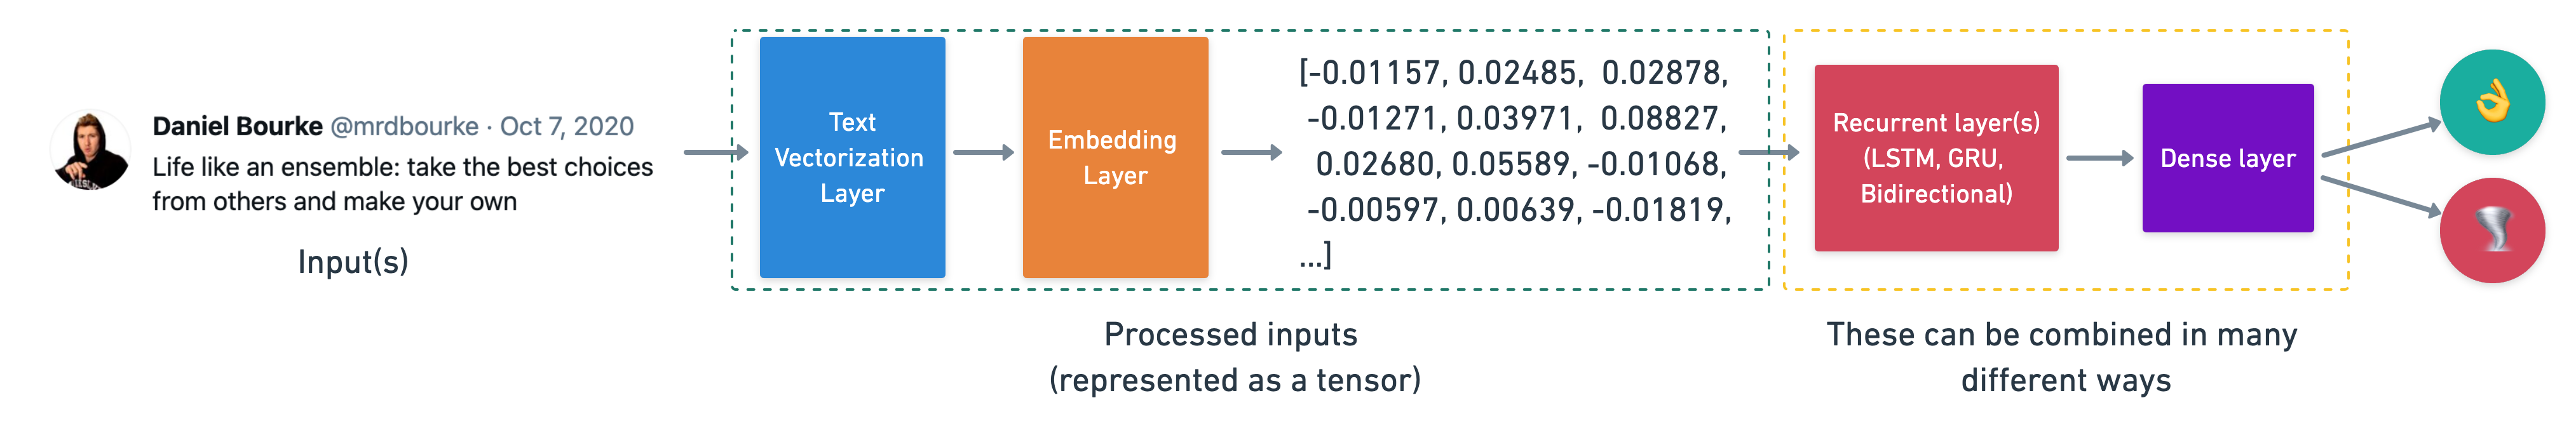

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer="uniform",
                                   input_length=max_length,
                                   name="embedding_2")
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=model_2_embedding(x)
print(x.shape)
x=layers.LSTM(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)


* Note: Reading the documentation for the TensorFlow LSTM layer, you'll find a plethora of parameters. Many of these have been tuned to make sure they compute as fast as possible. The main ones you'll be looking to adjust are units (number of hidden units) and return_sequences (set this to True when stacking LSTM or other recurrent layers).

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])


Saving TensorBoard log files to: model_logs/LSTM/20240211-035807
Epoch 1/5
215/215 [==============================] - 14s 40ms/step - loss: 0.5119 - accuracy: 0.7454 - val_loss: 0.4570 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3174 - accuracy: 0.8734 - val_loss: 0.5219 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2190 - accuracy: 0.9171 - val_loss: 0.5834 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1517 - accuracy: 0.9466 - val_loss: 0.6436 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1083 - accuracy: 0.9588 - val_loss: 0.8261 - val_accuracy: 0.7559


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10


24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.00655369],
        [0.7864382 ],
        [0.99870086],
        [0.04910854],
        [0.00517322],
        [0.9990177 ],
        [0.96683127],
        [0.99947685],
        [0.99900657],
        [0.19709338]], dtype=float32))

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.59055118110236,
 'precision': 0.7571361526829015,
 'recall': 0.7559055118110236,
 'f1': 0.7536918613918199}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


# Model 3:GRU

* https://en.wikipedia.org/wiki/Gated_recurrent_unit
* https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])


Saving TensorBoard log files to: model_logs/GRU/20240211-035830
Epoch 1/5
215/215 [==============================] - 10s 35ms/step - loss: 0.5240 - accuracy: 0.7326 - val_loss: 0.4558 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3187 - accuracy: 0.8717 - val_loss: 0.4954 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2187 - accuracy: 0.9175 - val_loss: 0.5673 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1586 - accuracy: 0.9442 - val_loss: 0.6310 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1211 - accuracy: 0.9577 - val_loss: 0.6156 - val_accuracy: 0.7703


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.31282225],
        [0.886632  ],
        [0.99692994],
        [0.12451764],
        [0.01402581],
        [0.9921445 ],
        [0.6423991 ],
        [0.9983718 ],
        [0.9977939 ],
        [0.39415112]], dtype=float32))

In [ ]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.770394799562429,
 'recall': 0.7703412073490814,
 'f1': 0.7692343337606365}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model 4: bidirectional RNN

* it goes back over a sentence again so that it gets better understanding

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding=layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128,
                                   embeddings_initializer="uniform",
                                   input_length=max_length,
                                   name="embedding_4")
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=model_4_embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])


Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240211-035853
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.5097 - accuracy: 0.7454 - val_loss: 0.4551 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3124 - accuracy: 0.8729 - val_loss: 0.5158 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2098 - accuracy: 0.9200 - val_loss: 0.5641 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1443 - accuracy: 0.9531 - val_loss: 0.6580 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1042 - accuracy: 0.9642 - val_loss: 0.6854 - val_accuracy: 0.7572


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.07351406],
       [0.9244271 ],
       [0.9997354 ],
       [0.17681308],
       [0.00911794],
       [0.9965823 ],
       [0.80416584],
       [0.99965906],
       [0.9997714 ],
       [0.29000717]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.7217847769029,
 'precision': 0.7568010990911528,
 'recall': 0.7572178477690289,
 'f1': 0.7565340664924178}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 75.72, Difference: -3.54
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


# one dimensional CNN

* 1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
* Max-pooling over time extracts the relevant ngrams for making a decision.
* The rest of the network classifies the text based on this information.

# Model 5 :Conv1D/Temporal convolution

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

* The 1-dimensional convolutional layer has an output which has been compressed inline with its parameters. And the same goes for the max pooling layer output.


In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 9.4781164e-03, -2.7109141e-02,  4.9372111e-03, ...,
           9.7220857e-03, -5.2630261e-02, -3.1019438e-03],
         [ 1.0342443e-01, -9.4551153e-02, -2.4059845e-02, ...,
          -4.5615666e-02, -9.0670288e-02,  6.2689751e-02],
         [-3.5096455e-02,  2.7177539e-02, -4.4276416e-02, ...,
          -4.0650081e-02, -2.7612617e-02,  9.0916166e-03],
         ...,
         [ 4.9153708e-02,  3.5243242e-03, -6.9839321e-02, ...,
           1.6208755e-02,  2.3006549e-05, -3.7407759e-03],
         [ 4.9153708e-02,  3.5243242e-03, -6.9839321e-02, ...,
           1.6208755e-02,  2.3006549e-05, -3.7407759e-03],
         [ 4.9153708e-02,  3.5243242e-03, -6.9839321e-02, ...,
           1.6208755e-02,  2.3006549e-05, -3.7407759e-03]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.00235303, 0.        , 0.10138766, 0.00895429,
          0.03047489, 0.05282754, 0.        , 0.        

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240211-035916
Epoch 1/5
215/215 [==============================] - 9s 33ms/step - loss: 0.5664 - accuracy: 0.7139 - val_loss: 0.4704 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3404 - accuracy: 0.8609 - val_loss: 0.4762 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2108 - accuracy: 0.9206 - val_loss: 0.5433 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1347 - accuracy: 0.9543 - val_loss: 0.6193 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0941 - accuracy: 0.9675 - val_loss: 0.6802 - val_accuracy: 0.7822


In [ ]:
model_5_preds_prob=model_5.predict(val_sentences)
model_5_preds_prob[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.6138494 ],
       [0.682669  ],
       [0.9997291 ],
       [0.05855276],
       [0.00453051],
       [0.9887242 ],
       [0.83116925],
       [0.9968264 ],
       [0.9993857 ],
       [0.08903889]], dtype=float32)

In [ ]:
model_5_preds=tf.squeeze(tf.round(model_5_preds_prob))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_results=calculate_results(y_true=val_labels,
                                  y_pred=model_5_preds)
model_5_results

{'accuracy': 78.21522309711287,
 'precision': 0.7849731976577976,
 'recall': 0.7821522309711286,
 'f1': 0.7797935460636591}

In [ ]:
compare_baseline_to_new_results(baseline_results,model_5_results)

Baseline accuracy: 79.27, New accuracy: 78.22, Difference: -1.05
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Pretrained Embeddings

# model 6:Tensorflow hub pretrained sentence encoder

* The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

* Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

In [ ]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples=embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

We can convert the TensorFlow Hub USE module into a Keras layer using the hub.KerasLayer class.

🔑 Note: Due to the size of the USE TensorFlow Hub module, it may take a little while to download. Once it's downloaded though, it'll be cached and ready to use. And as with many TensorFlow Hub modules, there is a "lite" version of the USE which takes up less space but sacrifices some performance and requires more preprocessing steps. However, depending on your available compute power, the lite version may be better for your application use case.

In [ ]:
# import modules as a layers
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="USE")

In [ ]:
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240211-040007
Epoch 1/5
215/215 [==============================] - 8s 23ms/step - loss: 0.5031 - accuracy: 0.7831 - val_loss: 0.4495 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4150 - accuracy: 0.8142 - val_loss: 0.4381 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.4007 - accuracy: 0.8215 - val_loss: 0.4339 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3934 - accuracy: 0.8259 - val_loss: 0.4291 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3870 - accuracy: 0.8288 - val_loss: 0.4302 - val_accuracy: 0.8123


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.14848699],
       [0.74982345],
       [0.98496085],
       [0.20536746],
       [0.721466  ],
       [0.70088816],
       [0.9758838 ],
       [0.9716731 ],
       [0.92030776],
       [0.08535835]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8145687227271431,
 'recall': 0.8123359580052494,
 'f1': 0.81078947666798}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.02


**Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).**

In [ ]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
model_7=tf.keras.models.clone_model(model_6)
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_7_history=model_7.fit(x=train_sentences_10_percent,
                            y=train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240211-040057
Epoch 1/5
22/22 [==============================] - 4s 41ms/step - loss: 0.6639 - accuracy: 0.6968 - val_loss: 0.6430 - val_accuracy: 0.7100
Epoch 2/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5869 - accuracy: 0.8236 - val_loss: 0.5851 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5099 - accuracy: 0.8280 - val_loss: 0.5341 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4482 - accuracy: 0.8411 - val_loss: 0.5043 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4071 - accuracy: 0.8411 - val_loss: 0.4885 - val_accuracy: 0.7730


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.25172418],
       [0.78978014],
       [0.90784436],
       [0.29442456],
       [0.5578219 ],
       [0.8389778 ],
       [0.82637906],
       [0.8249358 ],
       [0.8463594 ],
       [0.10244287]], dtype=float32)

In [ ]:
model_7_pred=tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_pred)
model_7_results

{'accuracy': 77.29658792650919,
 'precision': 0.777881100544101,
 'recall': 0.7729658792650919,
 'f1': 0.7695350827050221}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.30, Difference: -1.97
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [ ]:
all_model_results=pd.DataFrame({"baseline":baseline_results,
                                "simple_dense": model_1_results,
                                "lstm": model_2_results,
                                "gru": model_3_results,
                                "bidirectional": model_4_results,
                                "conv1d": model_5_results,
                                "tf_hub_sentence_encoder": model_6_results,
                                "tf_hub_10_percent_data": model_7_results
                                })
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,75.459318,0.780336,0.754593,0.743524
lstm,75.590551,0.757136,0.755906,0.753692
gru,77.034121,0.770395,0.770341,0.769234
bidirectional,75.721785,0.756801,0.757218,0.756534
conv1d,78.215223,0.784973,0.782152,0.779794
tf_hub_sentence_encoder,81.233596,0.814569,0.812336,0.810789
tf_hub_10_percent_data,77.296588,0.777881,0.772966,0.769535


In [ ]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100


In [ ]:
#all_model_results.plot(kind="bar",figure=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

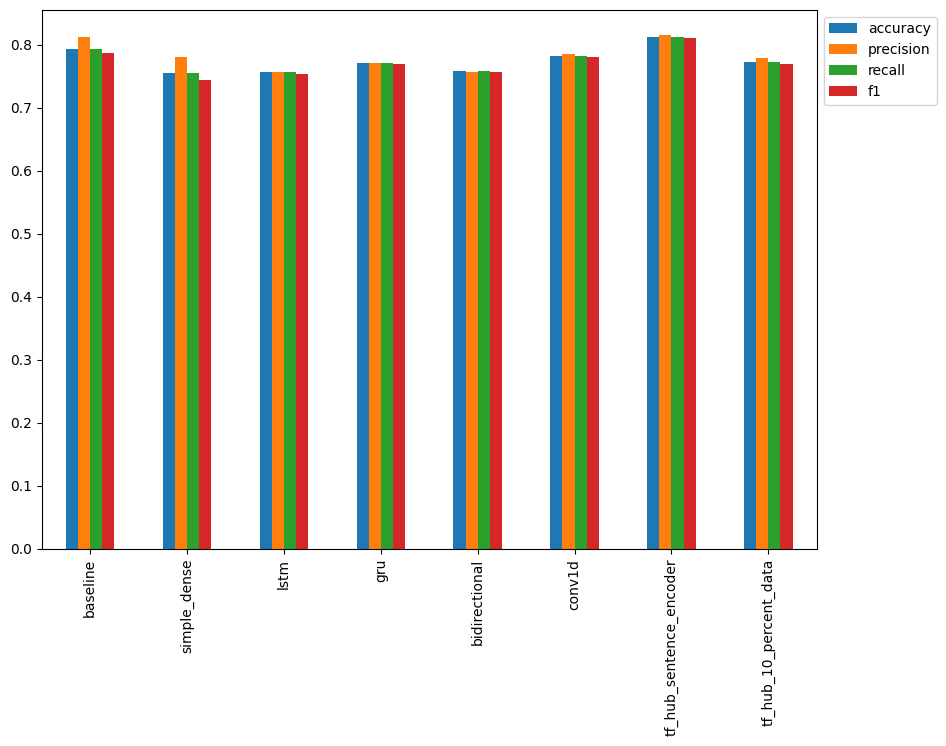

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 7))
all_model_results.plot(kind="bar", ax=ax).legend(bbox_to_anchor=(1.0,1.0))
plt.show()

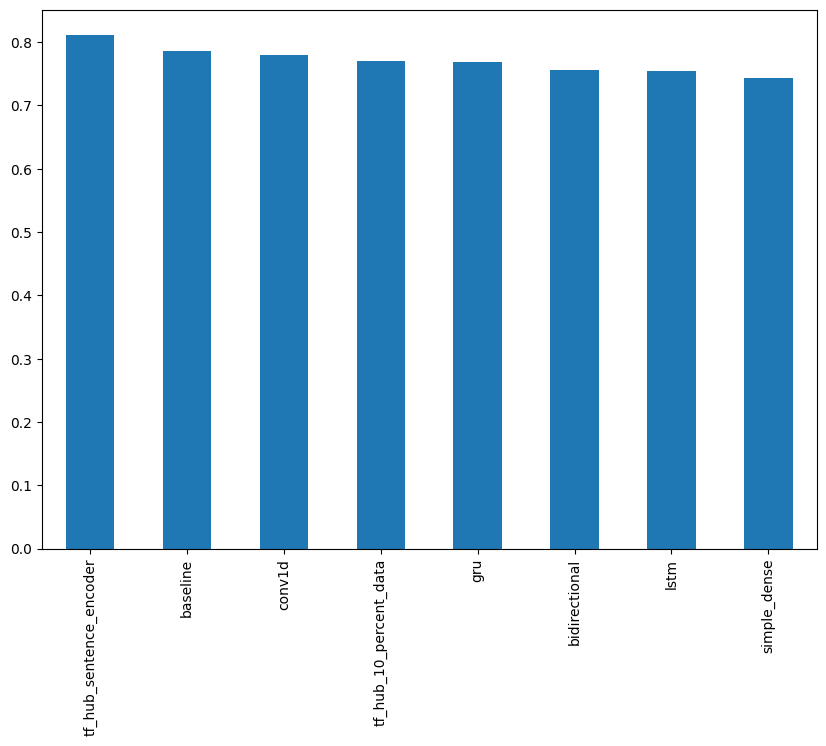

In [ ]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7));

# Combining our models (model ensembling/stacking)
* Think of it as trying to decide where to eat with your friends. If you all have similar tastes, you'll probably all pick the same restaurant. But if you've all got different tastes and still end up picking the same restaurant, the restaurant must be good.
* Since we're working with a classification problem, there are a few of ways we can combine our models:

* Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.
* Majority vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
* Model stacking - Take the outputs of each of your chosen models and use them as inputs to another model
* http://www.mlebook.com/wiki/doku.php

In [ ]:
# combining our baseline models,LSTM,USE trained on the full training data
baseline_pred_probs=np.max(model_0.predict_proba(val_sentences),axis=1)# he has retrained this to ensure consisitency
combined_pred_probs=baseline_pred_probs+tf.squeeze(model_2_pred_probs,axis=1)+tf.squeeze(model_6_pred_probs,axis=1)
combined_preds=tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
ensembel_results=calculate_results(val_labels,combined_preds)
ensembel_results

{'accuracy': 77.69028871391076,
 'precision': 0.7765743067490619,
 'recall': 0.7769028871391076,
 'f1': 0.7763928797999775}

access a group of rows and columns by label

In [ ]:
all_model_results.loc["ensemble_results"]=ensembel_results
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.754593,0.780336,0.754593,0.743524
lstm,0.755906,0.757136,0.755906,0.753692
gru,0.770341,0.770395,0.770341,0.769234
bidirectional,0.757218,0.756801,0.757218,0.756534
conv1d,0.782152,0.784973,0.782152,0.779794
tf_hub_sentence_encoder,0.812336,0.814569,0.812336,0.810789
tf_hub_10_percent_data,0.772966,0.777881,0.772966,0.769535
ensemble_results,77.690289,0.776574,0.776903,0.776393


In [ ]:
all_model_results.loc["ensemble_results"]["accuracy"]=all_model_results.loc["ensemble_results"]["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.754593,0.780336,0.754593,0.743524
lstm,0.755906,0.757136,0.755906,0.753692
gru,0.770341,0.770395,0.770341,0.769234
bidirectional,0.757218,0.756801,0.757218,0.756534
conv1d,0.782152,0.784973,0.782152,0.779794
tf_hub_sentence_encoder,0.812336,0.814569,0.812336,0.810789
tf_hub_10_percent_data,0.772966,0.777881,0.772966,0.769535
ensemble_results,0.776903,0.776574,0.776903,0.776393


 * It seems many of our model's results are similar. This may mean there are some limitations to what can be learned from our data. When many of your modelling experiments return similar results, it's a good idea to revisit your data, we'll do this shortly.

In [ ]:
# Saving and loading a trained model
# There are two main ways of saving a model in TensorFlow:

# The HDF5 format.
# The SavedModel format (default).

In [ ]:
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 15ms/step - loss: 0.4302 - accuracy: 0.8123


[0.430151104927063, 0.8123359680175781]

In [ ]:
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 24ms/step - loss: 0.4302 - accuracy: 0.8123


[0.430151104927063, 0.8123359680175781]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

* If you use SavedModel format (default), you can reload your model without specifying custom objects using the tensorflow.keras.models.load_model() function.

In [ ]:
loaded_model_6_SavedModel=tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4302 - accuracy: 0.8123


[0.430151104927063, 0.8123359680175781]

* The save_model function is used to save the entire model (i.e., model architecture, weights, optimizer state, training configuration, etc.) to disk.(HDF5 format )
* The load_model function, on the other hand, is used to load a previously saved model from disk.

* One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

* Once again, visualization is your friend. Visualize, visualize, visualize.

* To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

If our best model still isn't perfect, what examples is it getting wrong?
Which ones are the most wrong?
Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect thi

In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.148487
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.749823
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.984961
3,@camilacabello97 Internally and externally scr...,1,0.0,0.205367
4,Radiation emergency #preparedness starts with ...,1,1.0,0.721466


* Oh yeah! Now let's find our model's wrong predictions (where target != pred) and sort them by their prediction probability (the pred_prob column).

In [ ]:
most_wrong=val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.904100
759,FedEx will no longer transport bioterror patho...,0,1.0,0.851534
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.847136
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.840195
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.824122
628,@noah_anyname That's where the concentration c...,0,1.0,0.817443
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.778753
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.768632
144,The Sound of Arson,0,1.0,0.768167
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.767967


* Finally, we can write some code to visualize the sample text, truth label, prediction class and prediction probability. Because we've sorted our samples by prediction probability, viewing samples from the head of our most_wrong DataFrame will show us false positives.

In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9041000008583069
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8515335917472839
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8471361994743347
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8401948809623718
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.824122428894043
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob: 0.8174428343772888
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Pro

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.05533856153488159
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.05531042814254761
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.0529596209526062
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05127234756946564
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.049870166927576065
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.0426916666328907
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.039118923246

# Making predictions on the test dataset
Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.